# DS219-Data-Science-101 | TaeYeung-Kim

## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [48]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(url, header = None, names = column_names, skipinitialspace = True)
df = df.replace(' ?', pd.NA).dropna()

## Exploratory Data Analysis (EDA)
1. Structure of the dataset
2. Statistics from the dataset

In [49]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [50]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [53]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [54]:
df.describe(include = ['object'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


## Data Visualization
Visualizing key features of the dataset using plots
1. Univariate Visualization
    - key numerical value: **age**
    - key categorical value: **workclass**

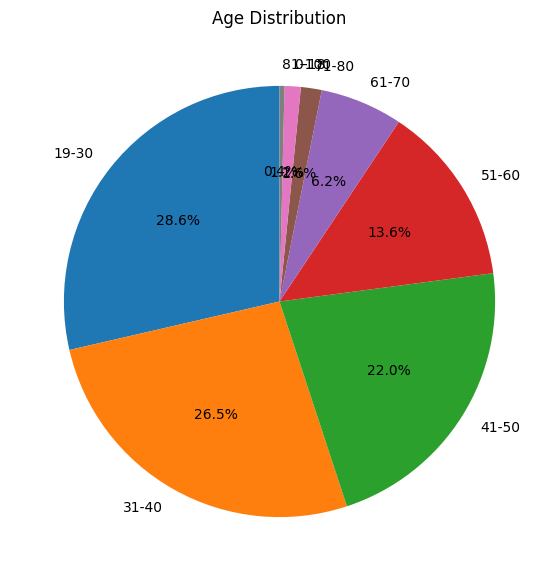

In [57]:
bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels, right = False)
age_distribution = df['age_group'].value_counts()
plt.figure(figsize = (10, 7))
age_distribution.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, colors = plt.cm.tab10.colors)
plt.title('Age Distribution')
plt.ylabel('')
plt.show()

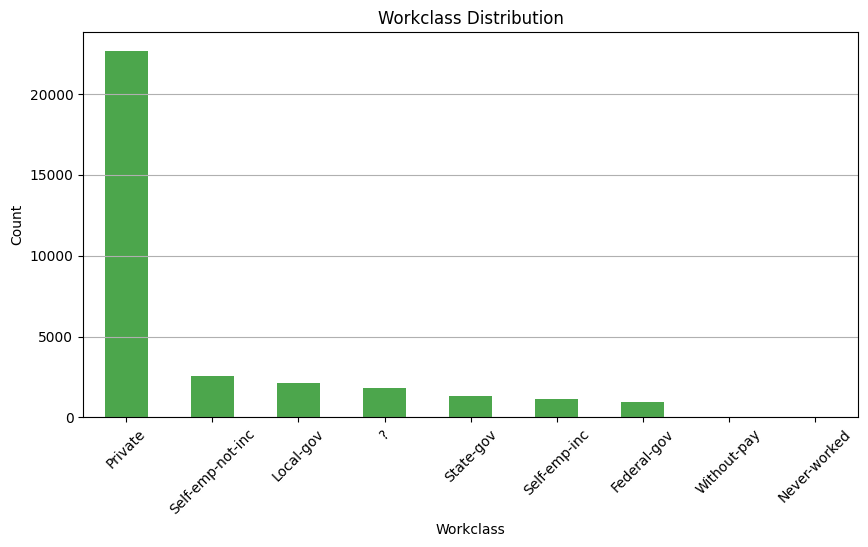

In [58]:
plt.figure(figsize = (10, 5))
df['workclass'].value_counts().plot(kind = 'bar', color = 'green', alpha = 0.7)
plt.title('Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

2. Bivariate Visualization
    - exploring relationship between pairs of variables, focusing on **income**

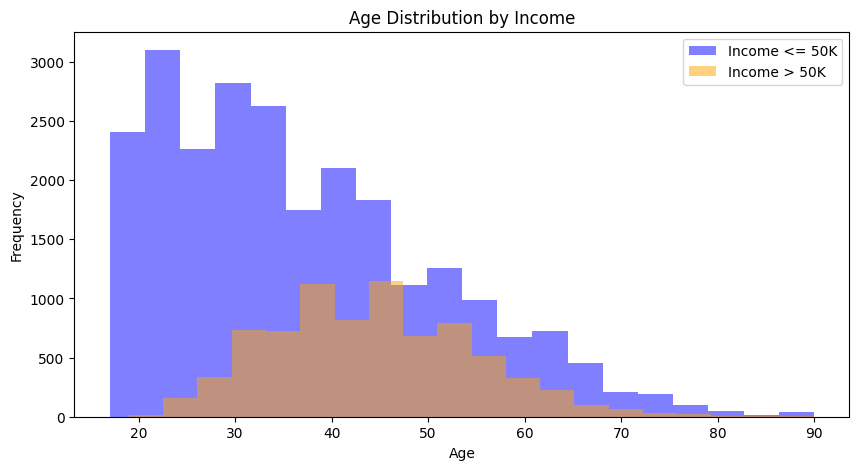

In [59]:
age_less_equal_50K = df[df['income'] == '<=50K']['age']
age_greater_50K = df[df['income'] == '>50K']['age']

plt.figure(figsize = (10, 5))
plt.hist(age_less_equal_50K, bins = 20, alpha = 0.5, label = 'Income <= 50K', color = 'blue')
plt.hist(age_greater_50K, bins = 20, alpha = 0.5, label = 'Income > 50K', color = 'orange')
plt.title('Age Distribution by Income')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

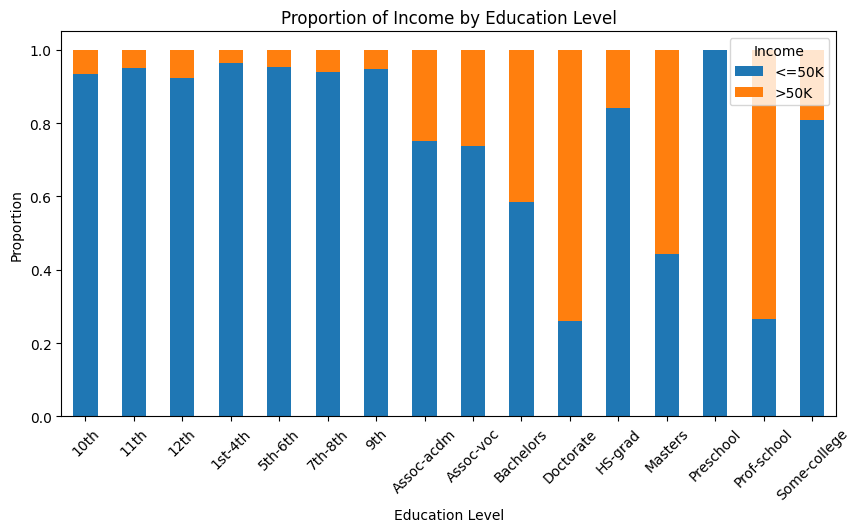

In [60]:
education_income_counts = pd.crosstab(df['education'], df['income'])
education_income_counts = education_income_counts.div(education_income_counts.sum(axis = 1), axis = 0)
education_income_counts.plot(kind = 'bar', stacked = True, figsize = (10, 5))
plt.title('Proportion of Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation = 45)
plt.legend(title = 'Income')
plt.show()

## Hypothesis Formulation
Hypothesis based on the visualization
1. **The average age of individuals with income <= 50K is roughly equal to the average age of individuals with income > 50K**
2. **Higher education levels are associated with a higher likelihood of having an income > 50K**

## Hypothesis Testing for Hypothesis 1

<Figure size 1000x500 with 0 Axes>

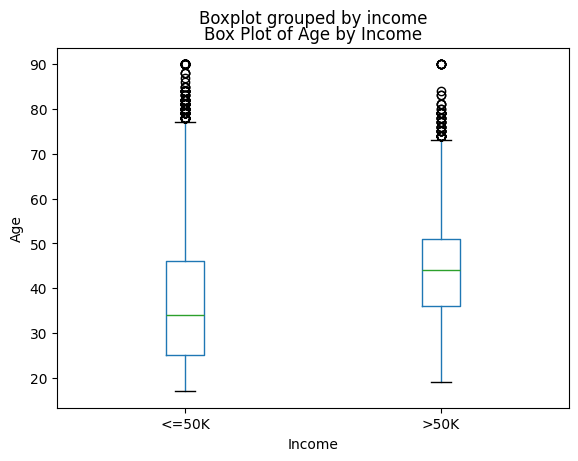

In [61]:
plt.figure(figsize = (10, 5))
df.boxplot(column = 'age', by = 'income', grid = False)
plt.title('Box Plot of Age by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

## Hypothesis Testing for Hypothesis 2

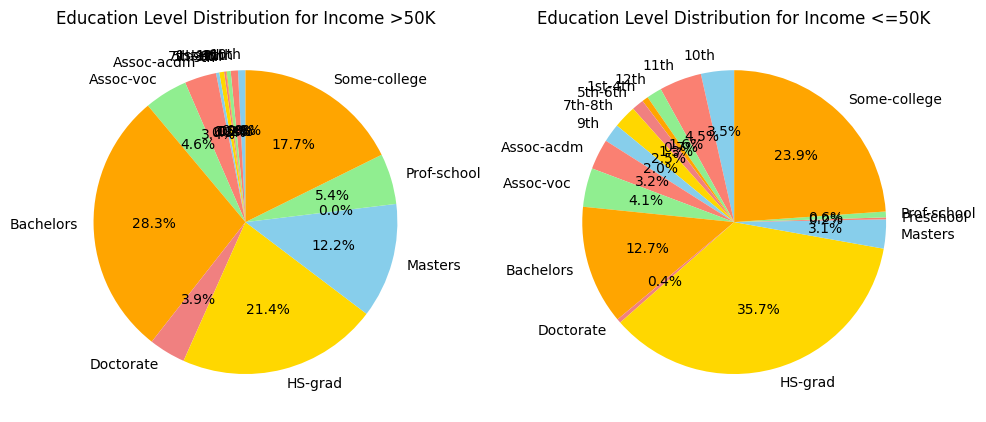

In [62]:
education_income_counts = df.groupby(['income', 'education']).size().unstack()
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
education_income_counts.loc['>50K'].plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'gold'])
plt.title('Education Level Distribution for Income >50K')
plt.ylabel('')

plt.subplot(1, 2, 2)
education_income_counts.loc['<=50K'].plot(kind = 'pie', autopct = '%1.1f%%', startangle = 90, colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'gold'])
plt.title('Education Level Distribution for Income <=50K')
plt.ylabel('')

plt.tight_layout()
plt.show()

## Explanation of the Code
### Importing the Dataset
`df = pd.read_csv()`: reads the dataset
- note that `skipinitialspace = True` parameter ensures that any leading spaces after the comma in the dataset are ignored
<br>
### Exploratory Data Analysis (EDA)
`df.head()`: to see the preview of the dataset
<br> `df.columns`: to see the columns of the dataset
<br> `df.info()`: to check the data structure
<br> `df.nunique()`: to check for unique values in each column
<br> `df.describe()`: to display summary statistics for numerical features
<br> `df.describe(include = ['object'])`: to display summary statistics for categorical values

## Final Report
### Objective
The objective of this analysis was to explore the relationship between **income** levels and two key factors that we chose: **age** and **education level**. 
<br>
### Dataset
The analysis utilized **Cencus Income Dataset**, which contains demographic information, including age, education level, and income categories for individuals.
<br>
Source: [https://archive.ics.uci.edu/dataset/20/census+income]
<br>
### Data Preparation
`df = pd.read_csv(url, header = None, names = column_names, skipinitialspace = True)`
<br>
### Exploratory Data Analysis (EDA)
- Visualization 1 (**Pie**): Age Distribution
- Visualization 2 (**Bar**): Workclass Distribution
- Visualization 3 (**Histogram**): Age Distribution by Income
- Visualization 4 (**Bar**): Education Level Distribution by Income
<br>
### Hypothesis Formulation
- Hypothesis 1: **The average age of inidividuals with income <= 50K is roughly equal to the average age of individuals with income > 50K.**
- Hypothesis 2: **Higher education levels are associated with a higher likelihood of having an income > 50K**
<br>
### Hypothesis Testing
- Visualization 1 (**Box**): Boxplot of Age by Income
    - Key Findings: Average age differs significantly
- Visualization 4 (**Pie**): Education Level Distribution by Income
    - Key Findings: Higher education levels correlate with higher income
<br>
### Summary of Findings
1. **Age and Income**: There is a significat difference in the average age of individuals based on income levels. Therefore, it disproves my Hypothesis 1.
2. **Education Level and Income**: Higher education levels are significantly associated with a greater likelihood of earning > 50K. Therefore, it proves my Hypothesis 2.